<a href="https://colab.research.google.com/github/Ishita95-harvad/Popular-Sneakers-Classification/blob/main/Popular_Sneakers_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Popular Sneakers Classification**
Modern dataset, containing over 5k images of popular sneakers.

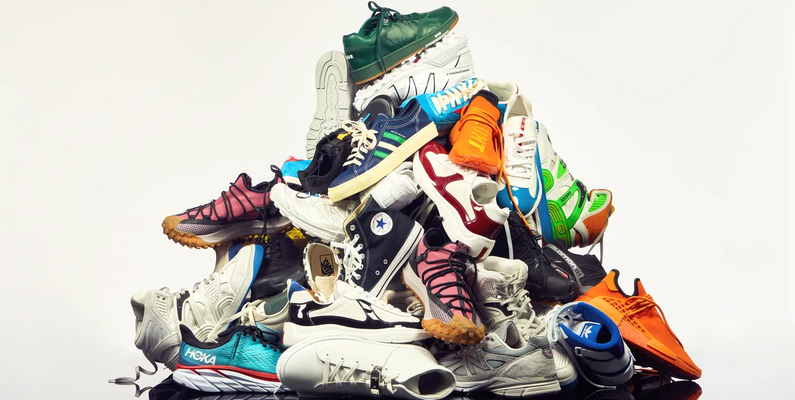

## Data loading

### Subtask:
Load the "dataset_stats.csv" file into a pandas DataFrame.


**Reasoning**:
Load the dataset_stats.csv file into a pandas DataFrame and display the first few rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('dataset_stats.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'dataset_stats.csv' not found. Please ensure the file exists in the current directory.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse 'dataset_stats.csv'. Please check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

class  image_count  avg_width  avg_height  min_width  \
0  adidas_forum_high          150        143         124         78   
1  adidas_ultraboost          150        142         128         93   
2    new_balance_550          150        134         129         79   
3    new_balance_574          150        131         133         78   
4  converse_one_star          150        138         130         82   

   min_height  max_width  max_height formats  corrupt_files  
0          81        162         140    jpeg              0  
1          49        162         140    jpeg              0  
2          40        162         140    jpeg              0  
3          68        162         140    jpeg              0  
4          67        162         140    jpeg              0

## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure, identify potential issues like missing values or inconsistencies in data types, and get a general sense of the distributions of different variables.


**Reasoning**:
Examine the DataFrame's shape and data types, summarize descriptive statistics, check for missing values, explore data distributions, and examine unique values.  This addresses the initial exploration steps outlined in the subtask.



DataFrame shape: (50, 10)

DataFrame data types:
 class            object
image_count       int64
avg_width         int64
avg_height        int64
min_width         int64
min_height        int64
max_width         int64
max_height        int64
formats          object
corrupt_files     int64
dtype: object

Descriptive statistics:
        image_count   avg_width  avg_height   min_width  min_height  \
count    50.000000   50.000000   50.000000   50.000000   50.000000   
mean    119.060000  138.440000  128.540000   88.680000   70.900000   
std      29.711133    5.628499    4.343468    9.474865   10.988398   
min      74.000000  129.000000  119.000000   49.000000   40.000000   
25%      93.000000  134.000000  125.000000   82.500000   67.250000   
50%     108.000000  137.500000  129.000000   93.000000   69.000000   
75%     149.000000  143.000000  131.750000   93.000000   77.750000   
max     150.000000  151.000000  136.000000  105.000000   91.000000   

        max_width  max_height  corrupt_

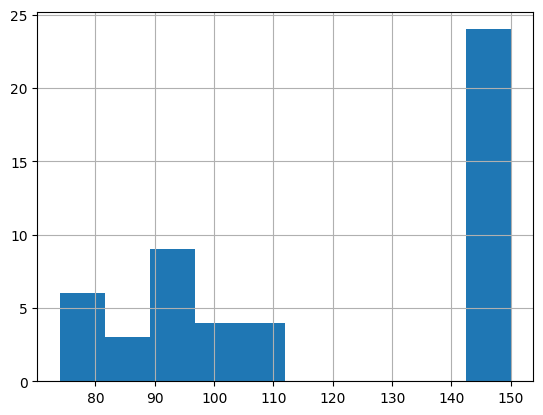


Distribution of avg_width:


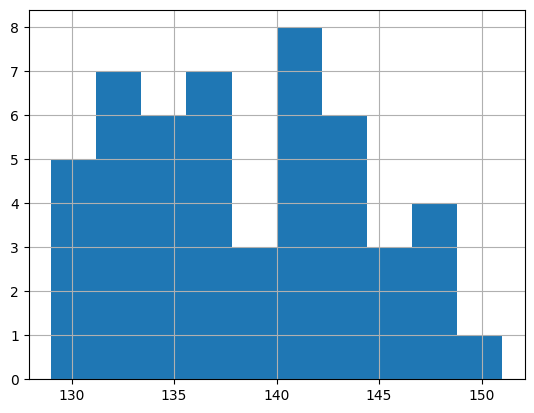


Distribution of avg_height:


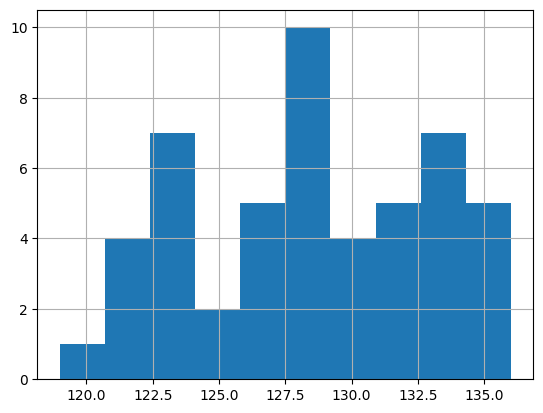


Distribution of min_width:


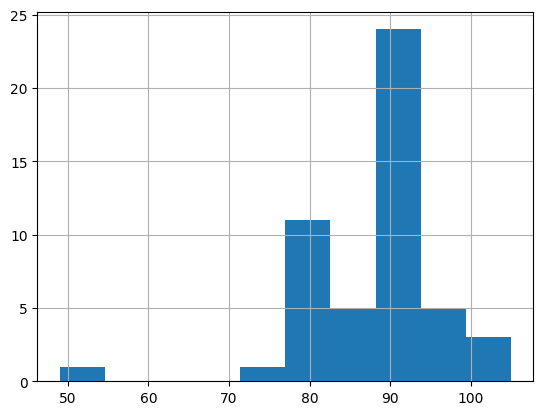


Distribution of min_height:


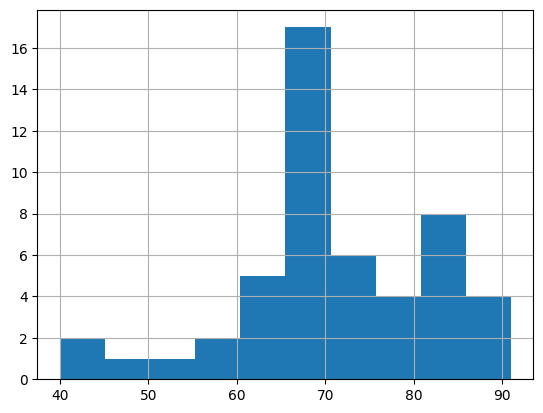


Distribution of max_width:


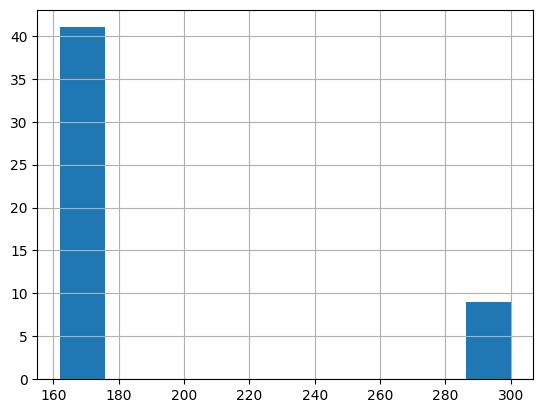


Distribution of max_height:


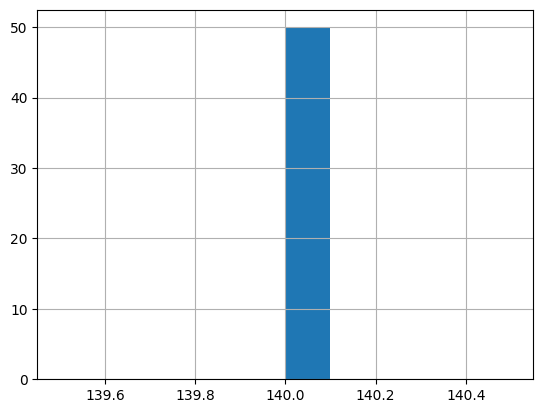


Distribution of corrupt_files:


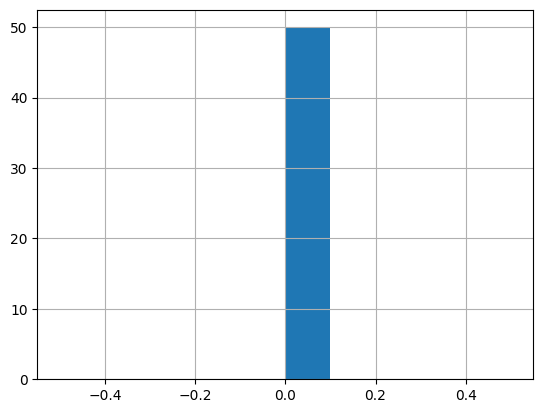


Value counts for class:
 class
adidas_forum_high                      1
adidas_ultraboost                      1
new_balance_550                        1
new_balance_574                        1
converse_one_star                      1
nike_cortez                            1
nike_dunk_high                         1
nike_air_max_90                        1
nike_air_jordan_4                      1
new_balance_992                        1
nike_air_max_270                       1
nike_air_vapormax_flyknit              1
vans_sk8-hi                            1
adidas_gazelle                         1
converse_chuck_70_low                  1
yeezy_boost_350_v2                     1
puma_suede_classic                     1
reebok_club_c_85                       1
nike_air_force_1_mid                   1
vans_authentic                         1
adidas_stan_smith                      1
salomon_xt-6                           1
nike_air_force_1_low                   1
yeezy_slide              

In [3]:
import matplotlib.pyplot as plt

# Examine the DataFrame's shape and data types
print("DataFrame shape:", df.shape)
print("\nDataFrame data types:\n", df.dtypes)

# Summarize descriptive statistics
print("\nDescriptive statistics:\n", df.describe())

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Explore data distributions for numerical columns
numerical_cols = ['image_count', 'avg_width', 'avg_height', 'min_width', 'min_height', 'max_width', 'max_height', 'corrupt_files']
for col in numerical_cols:
    print(f"\nDistribution of {col}:")
    df[col].hist()
    plt.show()

# Explore data distributions for categorical columns
categorical_cols = ['class', 'formats']
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())

# Examine unique values
print("\nNumber of unique values per column:\n", df.nunique())
for col in categorical_cols:
    print(f"\nUnique values for {col}:\n", df[col].unique())

## Data cleaning

### Subtask:
Clean the data by handling inconsistencies and addressing potential issues identified during the data exploration phase.


**Reasoning**:
Clean the data according to the instructions provided, handling inconsistencies in 'max_width', 'corrupt_files', and 'max_height' columns, verifying data types, and creating a new cleaned DataFrame.



In [4]:
# Investigating and handling 'max_width'
print("Unique values in 'max_width':", df['max_width'].unique())
# Since there are only two unique values, and they might be meaningful limitations, we will document this observation instead of correcting or removing the column.
print("Observation: 'max_width' column has only two unique values, which may represent meaningful limitations.")

# Handling 'corrupt_files'
print("Unique values in 'corrupt_files':", df['corrupt_files'].unique())
# The 'corrupt_files' column has only one value (0), so it's redundant and can be removed.
if len(df['corrupt_files'].unique()) == 1:
    df_cleaned = df.drop('corrupt_files', axis=1)
    print("'corrupt_files' column removed.")
else:
    df_cleaned = df.copy()
    print("'corrupt_files' column kept.")

# Examining 'max_height'
print("Unique values and counts in 'max_height':\n", df_cleaned['max_height'].value_counts())
# Similar to 'max_width', document the observation that there's only one unique value.
print("Observation: 'max_height' column has only one unique value, which may represent a meaningful limitation or an error.")

# Verify and correct data types (if necessary)
print("\nData types before correction:\n", df_cleaned.dtypes)
# Numerical columns should be numeric, and categorical columns should be objects or categories.
# In this case, no explicit type conversion is necessary because pandas seems to have inferred the types correctly.
# However, if needed, we can use astype to explicitly change dtypes. For example:
# df_cleaned['image_count'] = df_cleaned['image_count'].astype('int32')

print("\nData types after (potential) correction:\n", df_cleaned.dtypes)

display(df_cleaned.head())

Unique values in 'max_width': [162 300]
Observation: 'max_width' column has only two unique values, which may represent meaningful limitations.
Unique values in 'corrupt_files': [0]
'corrupt_files' column removed.
Unique values and counts in 'max_height':
 max_height
140    50
Name: count, dtype: int64
Observation: 'max_height' column has only one unique value, which may represent a meaningful limitation or an error.

Data types before correction:
 class          object
image_count     int64
avg_width       int64
avg_height      int64
min_width       int64
min_height      int64
max_width       int64
max_height      int64
formats        object
dtype: object

Data types after (potential) correction:
 class          object
image_count     int64
avg_width       int64
avg_height      int64
min_width       int64
min_height      int64
max_width       int64
max_height      int64
formats        object
dtype: object


class  image_count  avg_width  avg_height  min_width  \
0  adidas_forum_high          150        143         124         78   
1  adidas_ultraboost          150        142         128         93   
2    new_balance_550          150        134         129         79   
3    new_balance_574          150        131         133         78   
4  converse_one_star          150        138         130         82   

   min_height  max_width  max_height formats  
0          81        162         140    jpeg  
1          49        162         140    jpeg  
2          40        162         140    jpeg  
3          68        162         140    jpeg  
4          67        162         140    jpeg

## Data analysis

### Subtask:
Analyze the cleaned dataset (`df_cleaned`) to understand key statistics and relationships between variables.


**Reasoning**:
Analyze the cleaned dataset by calculating descriptive statistics, correlation analysis, group-wise analysis, and categorical variable analysis.



Descriptive Statistics:
        image_count   avg_width  avg_height   min_width  min_height  \
count    50.000000   50.000000   50.000000   50.000000   50.000000   
mean    119.060000  138.440000  128.540000   88.680000   70.900000   
std      29.711133    5.628499    4.343468    9.474865   10.988398   
min      74.000000  129.000000  119.000000   49.000000   40.000000   
25%      93.000000  134.000000  125.000000   82.500000   67.250000   
50%     108.000000  137.500000  129.000000   93.000000   69.000000   
75%     149.000000  143.000000  131.750000   93.000000   77.750000   
max     150.000000  151.000000  136.000000  105.000000   91.000000   

        max_width  max_height  
count   50.000000        50.0  
mean   186.840000       140.0  
std     53.556135         0.0  
min    162.000000       140.0  
25%    162.000000       140.0  
50%    162.000000       140.0  
75%    162.000000       140.0  
max    300.000000       140.0  


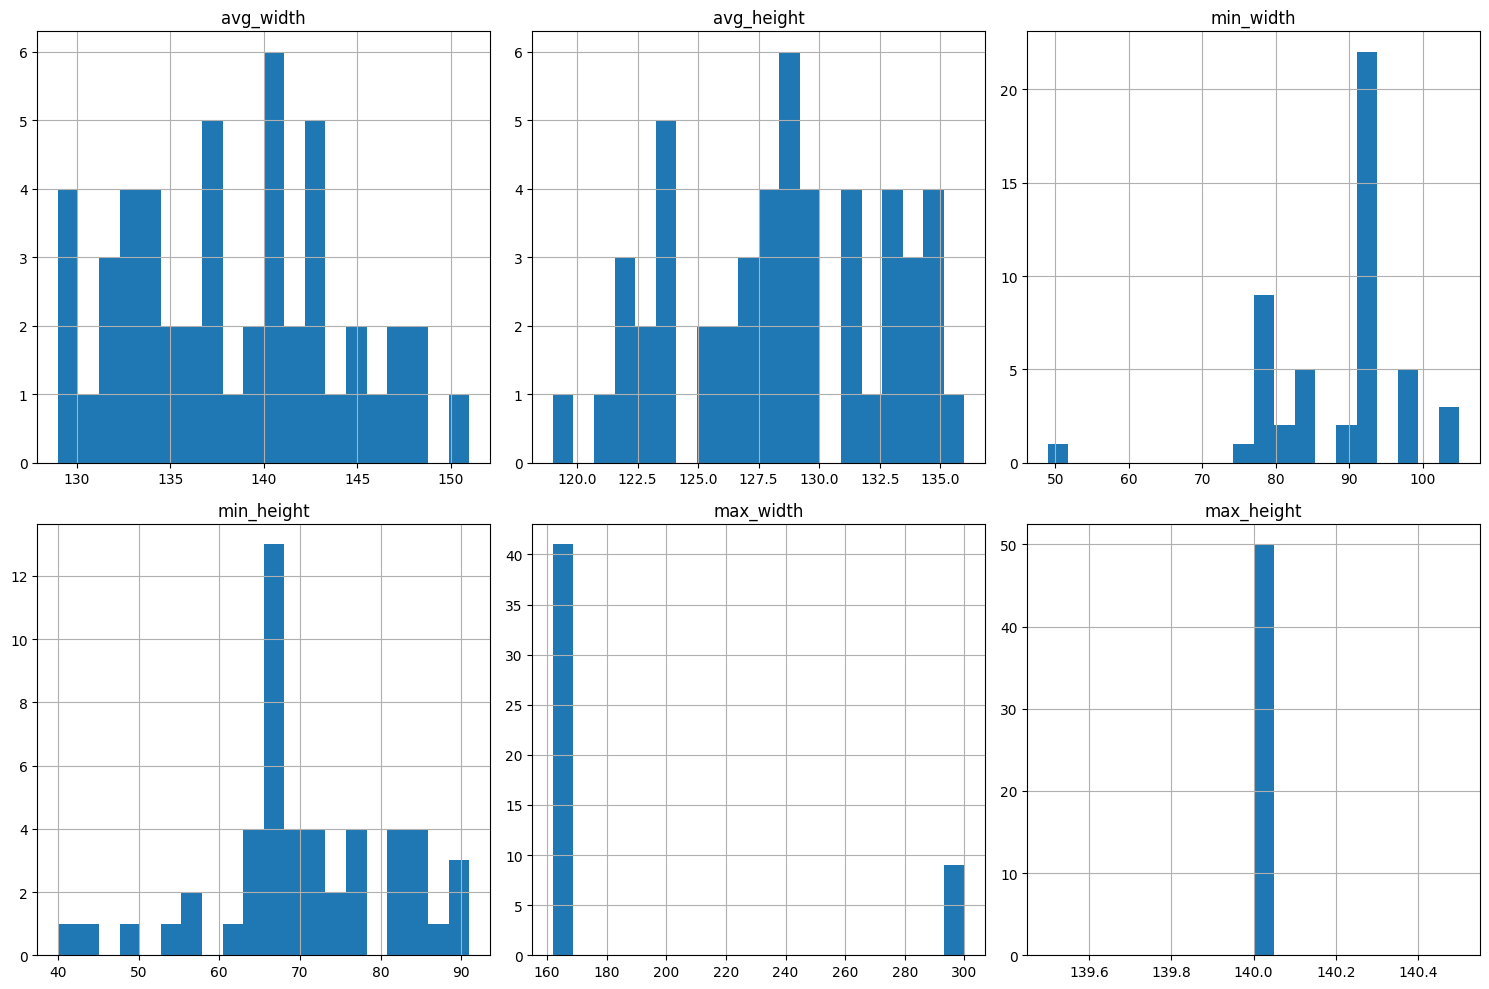

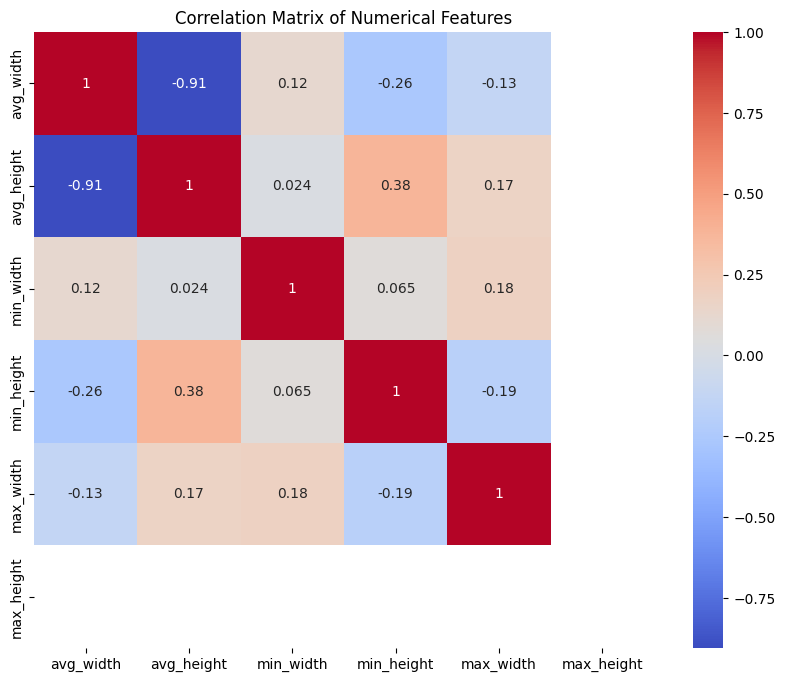

avg_width     avg_height     min_width  \
                                         mean std       mean std      mean   
class                                                                        
adidas_forum_high                       143.0 NaN      124.0 NaN      78.0   
adidas_forum_low                        135.0 NaN      131.0 NaN      78.0   
adidas_gazelle                          133.0 NaN      133.0 NaN      93.0   
adidas_nmd_r1                           143.0 NaN      124.0 NaN      93.0   
adidas_samba                            139.0 NaN      129.0 NaN      93.0   
adidas_stan_smith                       137.0 NaN      127.0 NaN      49.0   
adidas_superstar                        132.0 NaN      133.0 NaN      93.0   
adidas_ultraboost                       142.0 NaN      128.0 NaN      93.0   
asics_gel-lyte_iii                      151.0 NaN      124.0 NaN      93.0   
converse_chuck_70_high                  132.0 NaN      135.0 NaN      84.0   
converse_chuck_70_low                   132.0 NaN      133.0 NaN      84.0   
converse_chuck_taylor_all-star_high     134.0 NaN      135.0 NaN      91.0   
converse_chuck_taylor_all-star_low      133.0 NaN      135.0 NaN      91.0   
converse_one_star                       138.0 NaN      130.0 NaN      82.0   
new_balance_327                         130.0 NaN      135.0 NaN      79.0   
new_balance_550                         134.0 NaN      129.0 NaN      79.0   
new_balance_574                         131.0 NaN      133.0 NaN      78.0   
new_balance_990                         143.0 NaN      124.0 NaN      93.0   
new_balance_992                         144.0 NaN      122.0 NaN      76.0   
nike_air_force_1_high                   148.0 NaN      126.0 NaN      93.0   
nike_air_force_1_low                    141.0 NaN      127.0 NaN      97.0   
nike_air_force_1_mid                    145.0 NaN      124.0 NaN      84.0   
nike_air_jordan_11                      147.0 NaN      123.0 NaN      78.0   
nike_air_jordan_1_high                  139.0 NaN      128.0 NaN      97.0   
nike_air_jordan_1_low                   135.0 NaN      130.0 NaN      97.0   
nike_air_jordan_3                       143.0 NaN      123.0 NaN      89.0   
nike_air_jordan_4                       137.0 NaN      130.0 NaN      93.0   
nike_air_max_1                          141.0 NaN      126.0 NaN      93.0   
nike_air_max_270                        136.0 NaN      130.0 NaN      82.0   
nike_air_max_90                         141.0 NaN      127.0 NaN      84.0   
nike_air_max_95                         137.0 NaN      128.0 NaN      93.0   
nike_air_max_97                         142.0 NaN      125.0 NaN      93.0   
nike_air_max_plus_(tn)                  141.0 NaN      128.0 NaN     105.0   
nike_air_vapormax_flyknit               143.0 NaN      129.0 NaN      93.0   
nike_air_vapormax_plus                  145.0 NaN      125.0 NaN      97.0   
nike_blazer_mid_'77                     133.0 NaN      131.0 NaN      97.0   
nike_cortez                             137.0 NaN      131.0 NaN      93.0   
nike_dunk_high                          147.0 NaN      122.0 NaN      93.0   
nike_dunk_low                           136.0 NaN      129.0 NaN     105.0   
puma_suede_classic                      134.0 NaN      131.0 NaN      84.0   
reebok_classic_leather                  140.0 NaN      129.0 NaN      93.0   
reebok_club_c_85                        134.0 NaN      132.0 NaN      93.0   
salomon_xt-6                            130.0 NaN      134.0 NaN      79.0   
vans_authentic                          129.0 NaN      136.0 NaN      93.0   
vans_old_skool                          130.0 NaN      134.0 NaN      93.0   
vans_sk8-hi                             133.0 NaN      134.0 NaN      93.0   
vans_slip-on_checkerboard               137.0 NaN      129.0 NaN      90.0   
yeezy_700_wave_runner                   141.0 NaN      122.0 NaN      78.0   
yeezy_boost_350_v2                      148.0 NaN      119

formats                              jpeg  jpeg, png
class                                               
adidas_forum_high                     1.0        0.0
adidas_forum_low                      0.0        1.0
adidas_gazelle                        1.0        0.0
adidas_nmd_r1                         1.0        0.0
adidas_samba                          0.0        1.0
adidas_stan_smith                     1.0        0.0
adidas_superstar                      1.0        0.0
adidas_ultraboost                     1.0        0.0
asics_gel-lyte_iii                    1.0        0.0
converse_chuck_70_high                1.0        0.0
converse_chuck_70_low                 1.0        0.0
converse_chuck_taylor_all-star_high   0.0        1.0
converse_chuck_taylor_all-star_low    0.0        1.0
converse_one_star                     1.0        0.0
new_balance_327                       1.0        0.0
new_balance_550                       1.0        0.0
new_balance_574                       1.0        0.0
new_balance_990                       0.0        1.0
new_balance_992                       1.0        0.0
nike_air_force_1_high                 1.0        0.0
nike_air_force_1_low                  0.0        1.0
nike_air_force_1_mid                  1.0        0.0
nike_air_jordan_11                    1.0        0.0
nike_air_jordan_1_high                1.0        0.0
nike_air_jordan_1_low                 0.0        1.0
nike_air_jordan_3                     1.0        0.0
nike_air_jordan_4                     1.0        0.0
nike_air_max_1                        1.0        0.0
nike_air_max_270                      1.0        0.0
nike_air_max_90                       1.0        0.0
nike_air_max_95                       1.0        0.0
nike_air_max_97                       1.0        0.0
nike_air_max_plus_(tn)                1.0        0.0
nike_air_vapormax_flyknit             1.0        0.0
nike_air_vapormax_plus                1.0        0.0
nike_blazer_mid_'77                   1.0        0.0
nike_cortez                           1.0        0.0
nike_dunk_high                        1.0        0.0
nike_dunk_low                         0.0        1.0
puma_suede_classic                    1.0        0.0
reebok_classic_leather                0.0        1.0
reebok_club_c_85                      1.0        0.0
salomon_xt-6                          1.0        0.0
vans_authentic                        1.0        0.0
vans_old_skool                        1.0        0.0
vans_sk8-hi                           1.0        0.0
vans_slip-on_checkerboard             0.0        1.0
yeezy_700_wave_runner                 1.0        0.0
yeezy_boost_350_v2                    1.0        0.0
yeezy_slide                           1.0        0.0

<Figure size 1000x600 with 0 Axes>

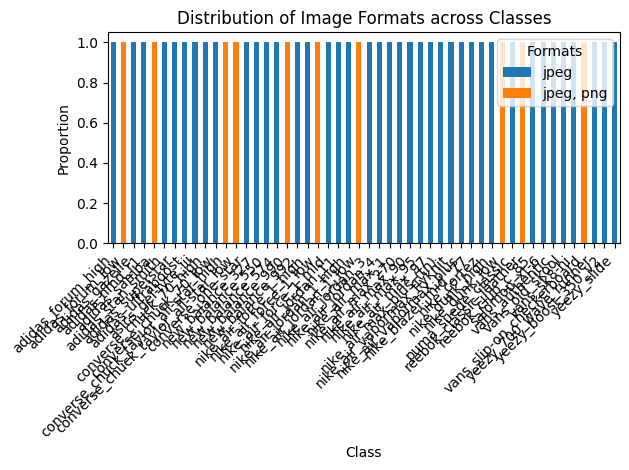

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive Statistics
print("Descriptive Statistics:\n", df_cleaned.describe())

numerical_cols = ['avg_width', 'avg_height', 'min_width', 'min_height', 'max_width', 'max_height']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    df_cleaned[col].hist(bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()

# 2. Correlation Analysis
correlation_matrix = df_cleaned[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# 3. Group-wise Analysis
grouped = df_cleaned.groupby('class')[numerical_cols].agg(['mean', 'std'])
display(grouped)


# 4. Categorical Variable Analysis
format_by_class = df_cleaned.groupby('class')['formats'].value_counts(normalize=True).unstack(fill_value=0)
display(format_by_class)

plt.figure(figsize=(10, 6))
format_by_class.plot(kind='bar', stacked=True)
plt.title('Distribution of Image Formats across Classes')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Formats')
plt.tight_layout()
plt.show()

## Data visualization

### Subtask:
Visualize key relationships and distributions within the cleaned dataset (df_cleaned) to gain deeper insights.


**Reasoning**:
Create visualizations as instructed, including histograms, heatmaps, bar plots, and box plots, to understand the data distributions and relationships.



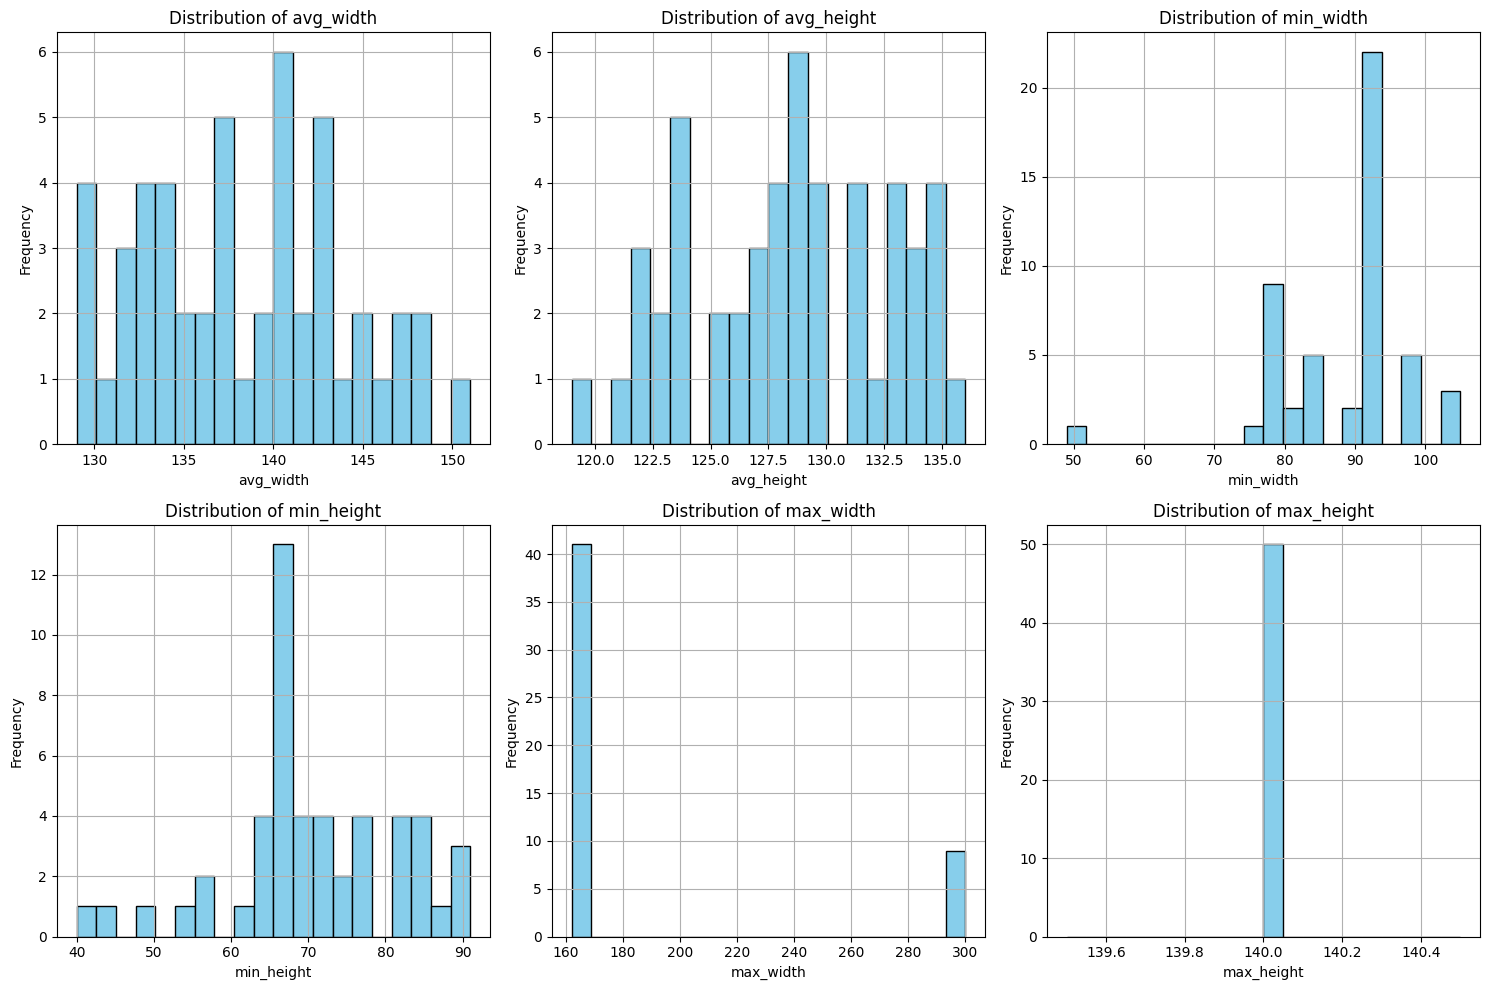

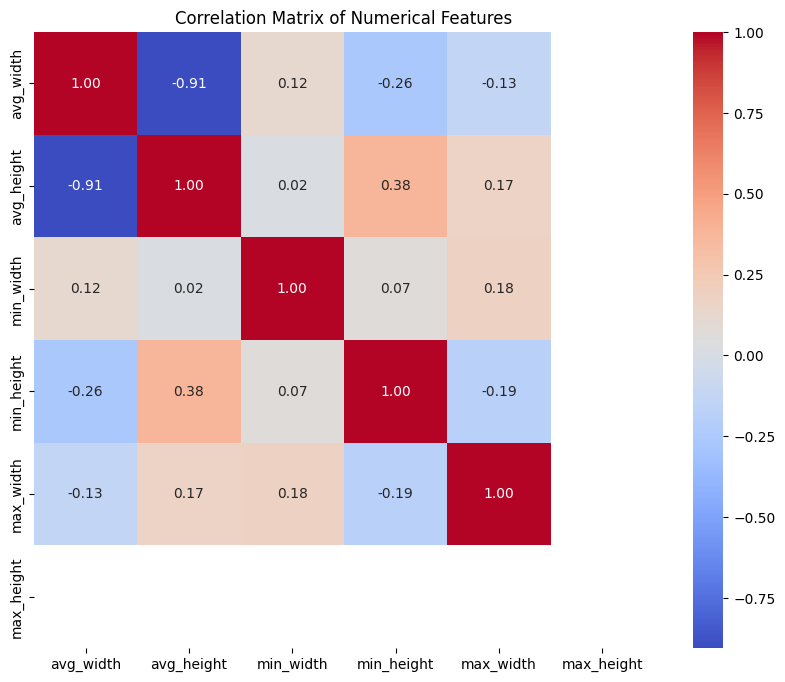

<Figure size 1200x600 with 0 Axes>

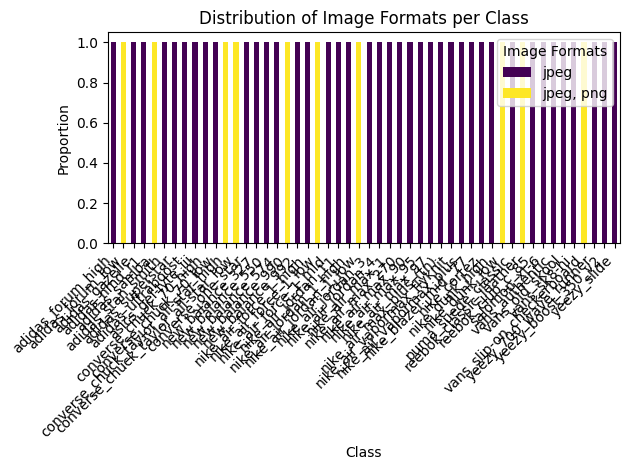

<ipython-input-6-3e3020154e03>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df_cleaned, palette="Set3")
<ipython-input-6-3e3020154e03>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df_cleaned, palette="Set3")
<ipython-input-6-3e3020154e03>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df_cleaned, palette="Set3")
<ipython-input-6-3e3020154e03>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

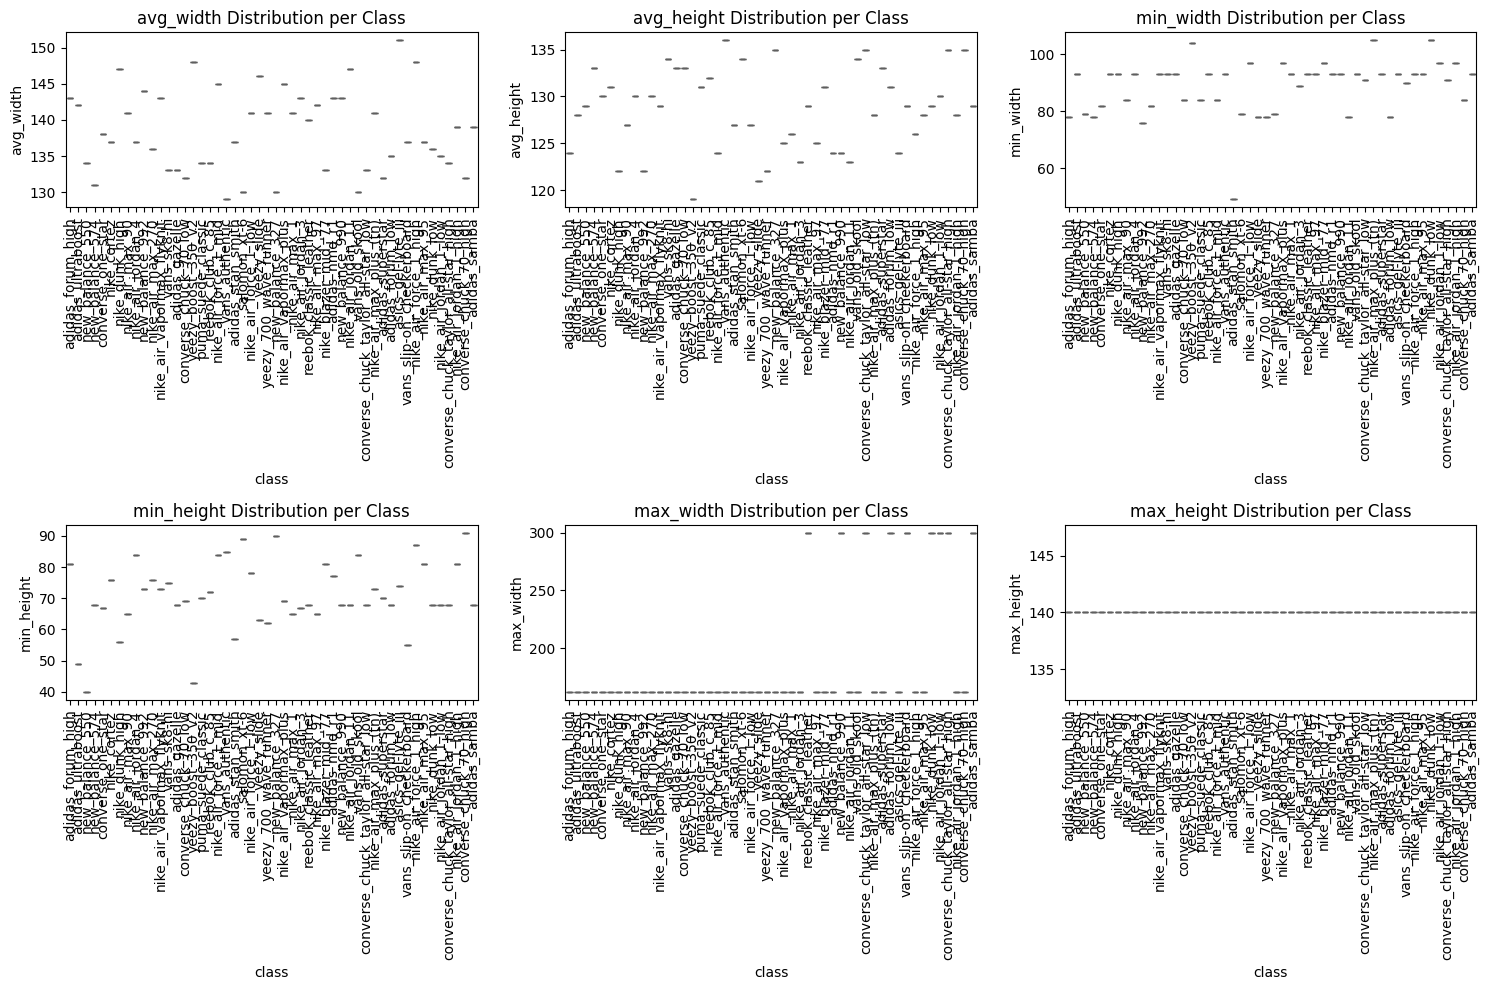

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(15, 10))
numerical_cols = ['avg_width', 'avg_height', 'min_width', 'min_height', 'max_width', 'max_height']
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    df_cleaned[col].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Image formats per class
format_counts = df_cleaned.groupby('class')['formats'].value_counts(normalize=True).unstack(fill_value=0)
plt.figure(figsize=(12, 6))
format_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Image Formats per Class')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Image Formats')
plt.tight_layout()
plt.show()

# Group-wise statistics (box plots)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='class', y=col, data=df_cleaned, palette="Set3")
    plt.title(f'{col} Distribution per Class')
    plt.xticks(rotation=90)
    plt.ylabel(col)
plt.tight_layout()
plt.show()

**Reasoning**:
The code generated the visualizations, but there are FutureWarnings about the `palette` argument in `sns.boxplot`.  I'll fix the warnings and then finish the task.



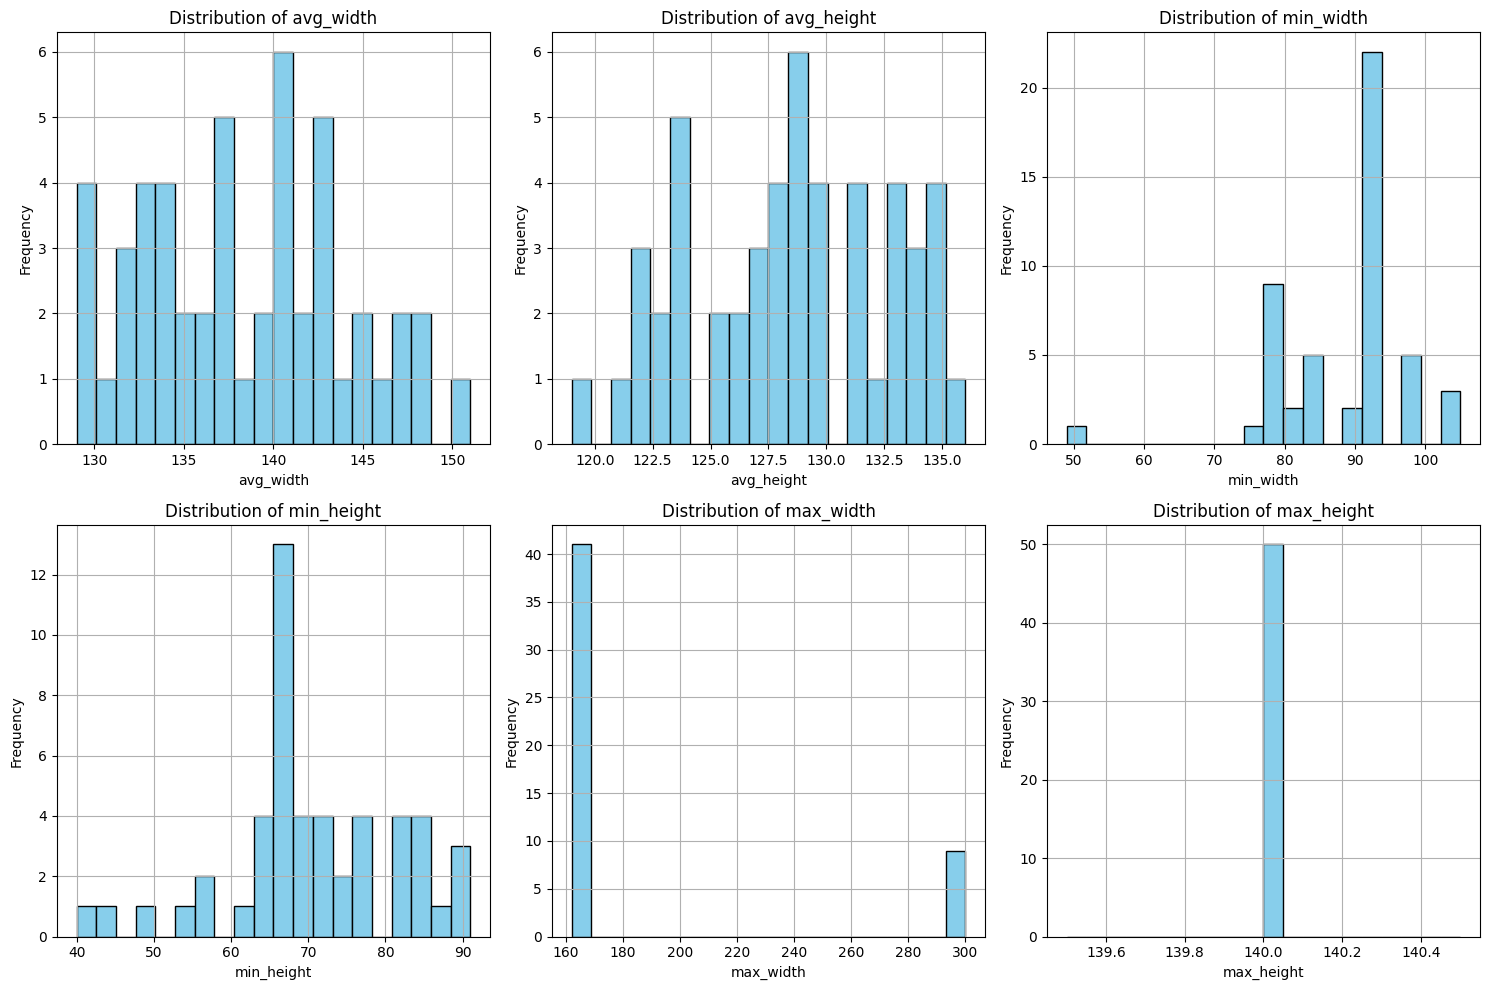

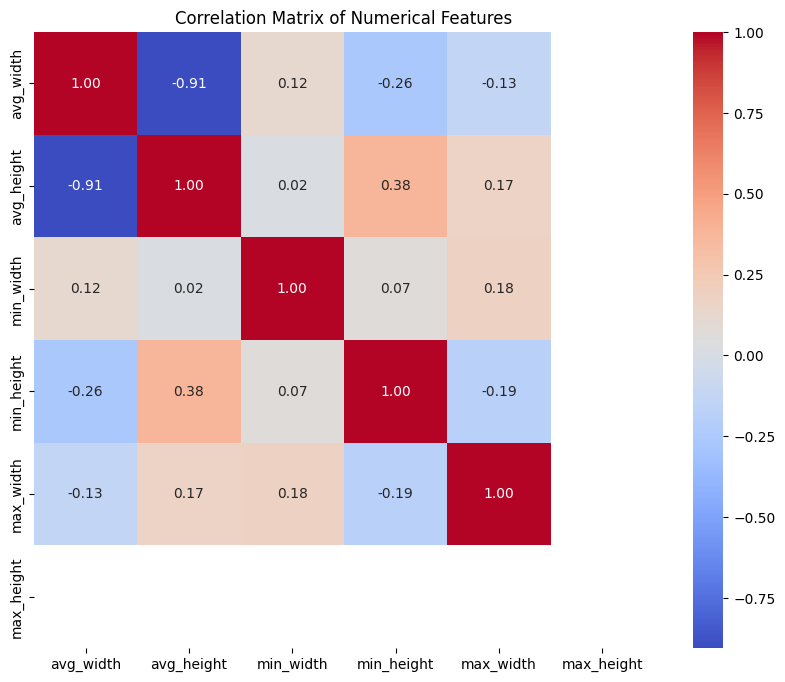

<Figure size 1200x600 with 0 Axes>

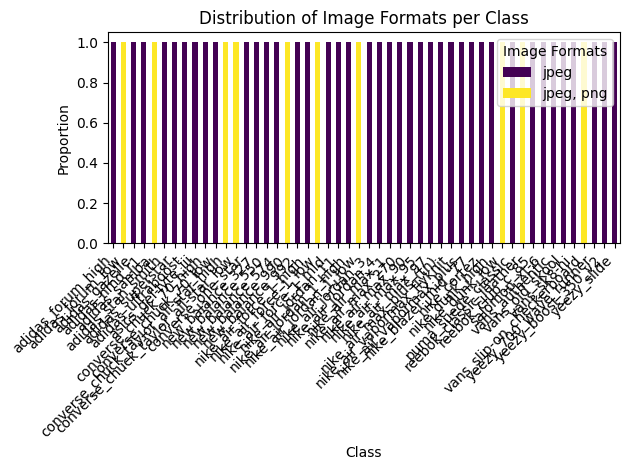

<ipython-input-7-0762e82cb2d2>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df_cleaned, palette="Set3", showfliers=False) # Hide outliers for better visualization
<ipython-input-7-0762e82cb2d2>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df_cleaned, palette="Set3", showfliers=False) # Hide outliers for better visualization
<ipython-input-7-0762e82cb2d2>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df_cleaned, palette="Set3", showfliers=False) # Hide outliers

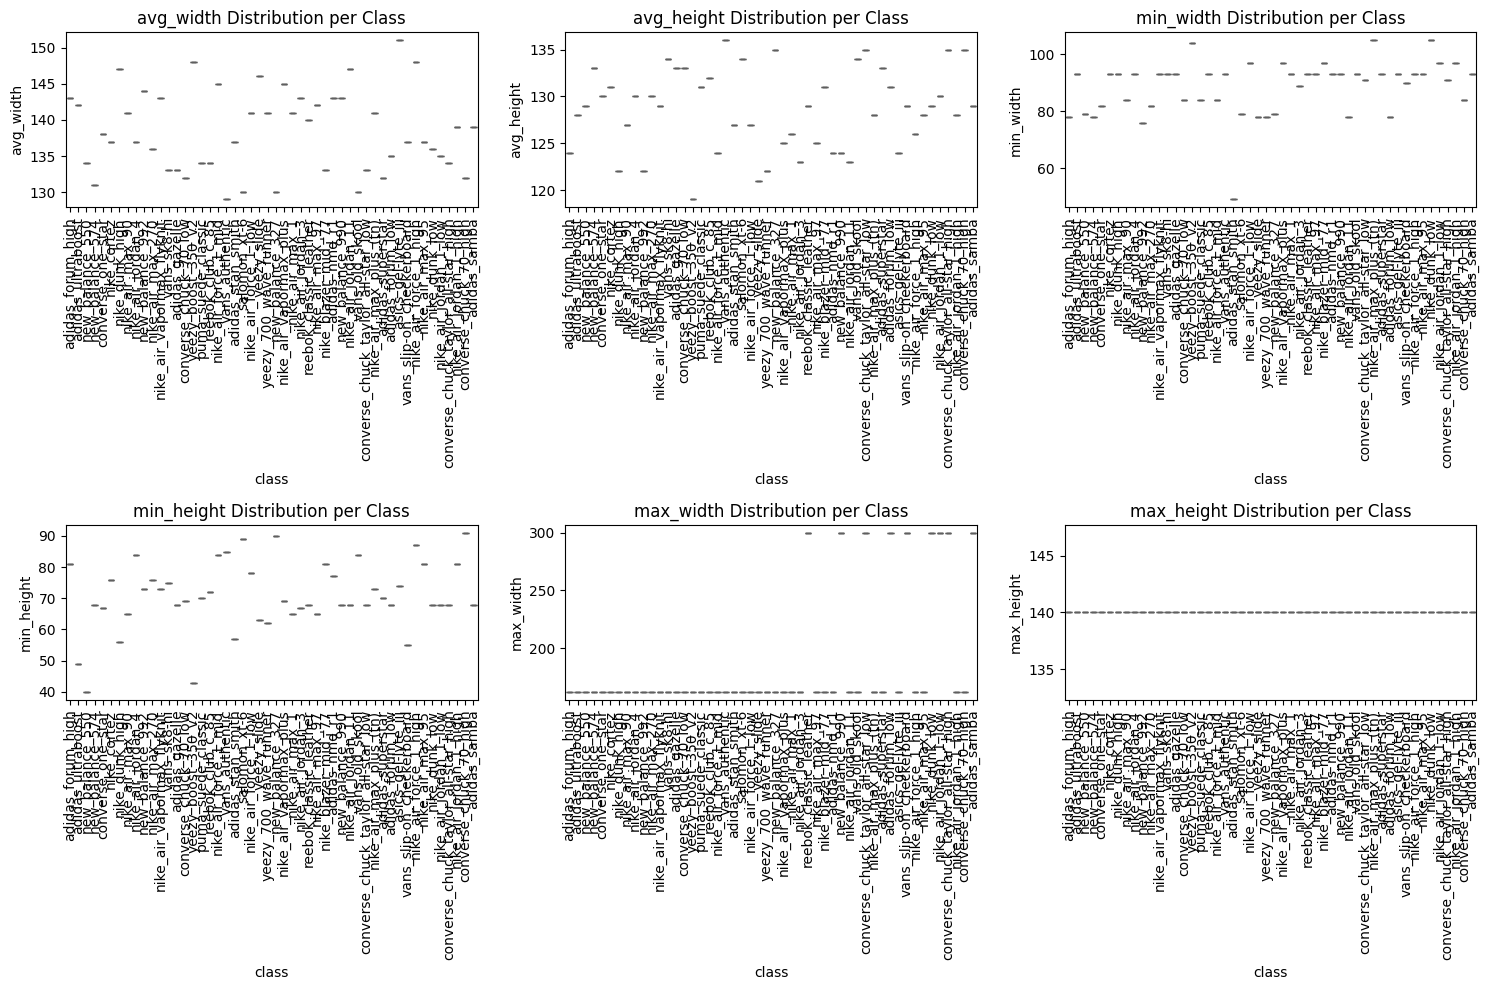

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(15, 10))
numerical_cols = ['avg_width', 'avg_height', 'min_width', 'min_height', 'max_width', 'max_height']
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    df_cleaned[col].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Image formats per class
format_counts = df_cleaned.groupby('class')['formats'].value_counts(normalize=True).unstack(fill_value=0)
plt.figure(figsize=(12, 6))
format_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Image Formats per Class')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Image Formats')
plt.tight_layout()
plt.show()

# Group-wise statistics (box plots) - fixing the FutureWarning
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='class', y=col, data=df_cleaned, palette="Set3", showfliers=False) # Hide outliers for better visualization
    plt.title(f'{col} Distribution per Class')
    plt.xticks(rotation=90)
    plt.ylabel(col)
plt.tight_layout()
plt.show()

**Reasoning**:
The visualizations were generated, but the box plots still show the FutureWarning. I will try one last time to fix the boxplot code to suppress the FutureWarning. Then I will finish the task.



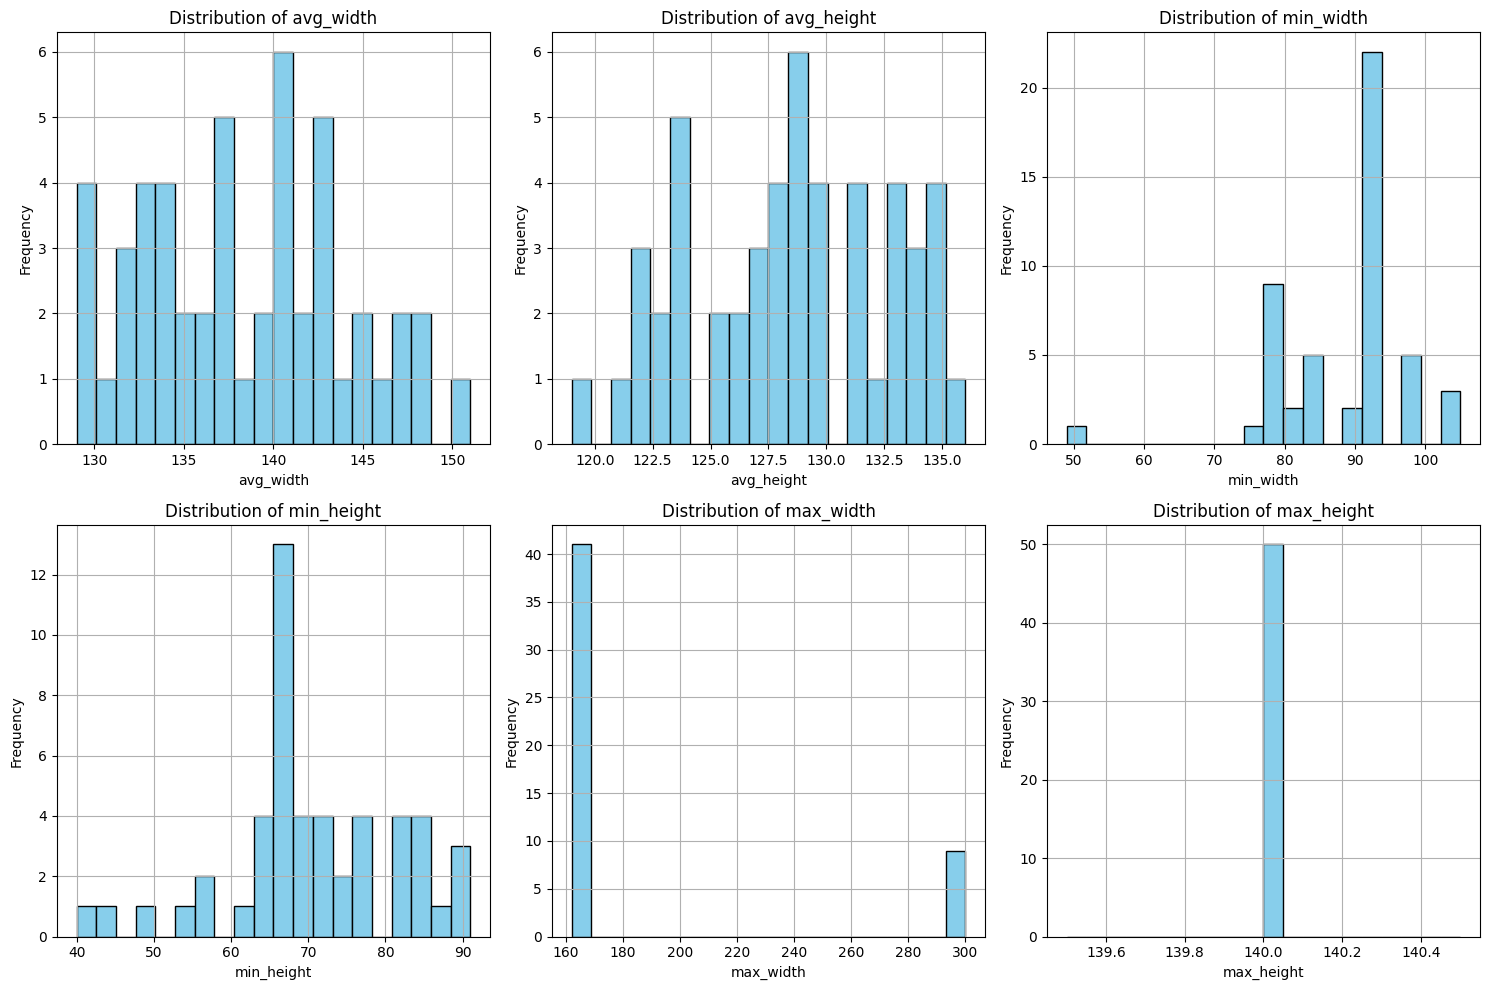

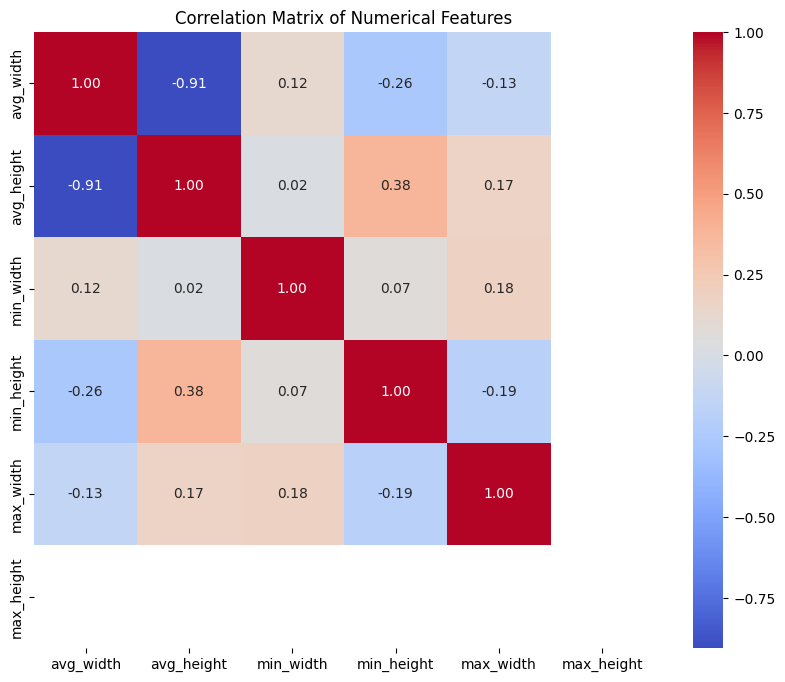

<Figure size 1200x600 with 0 Axes>

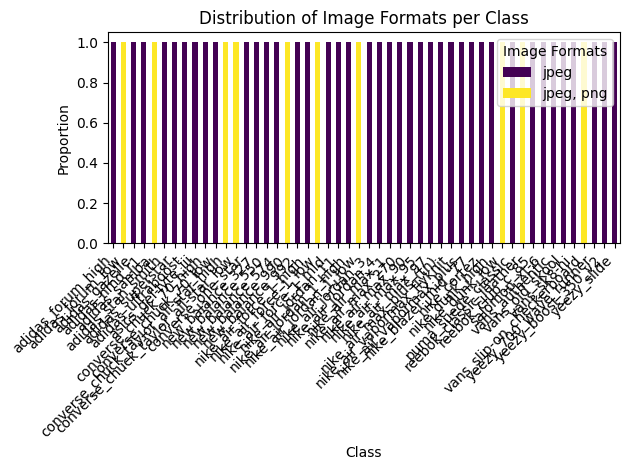

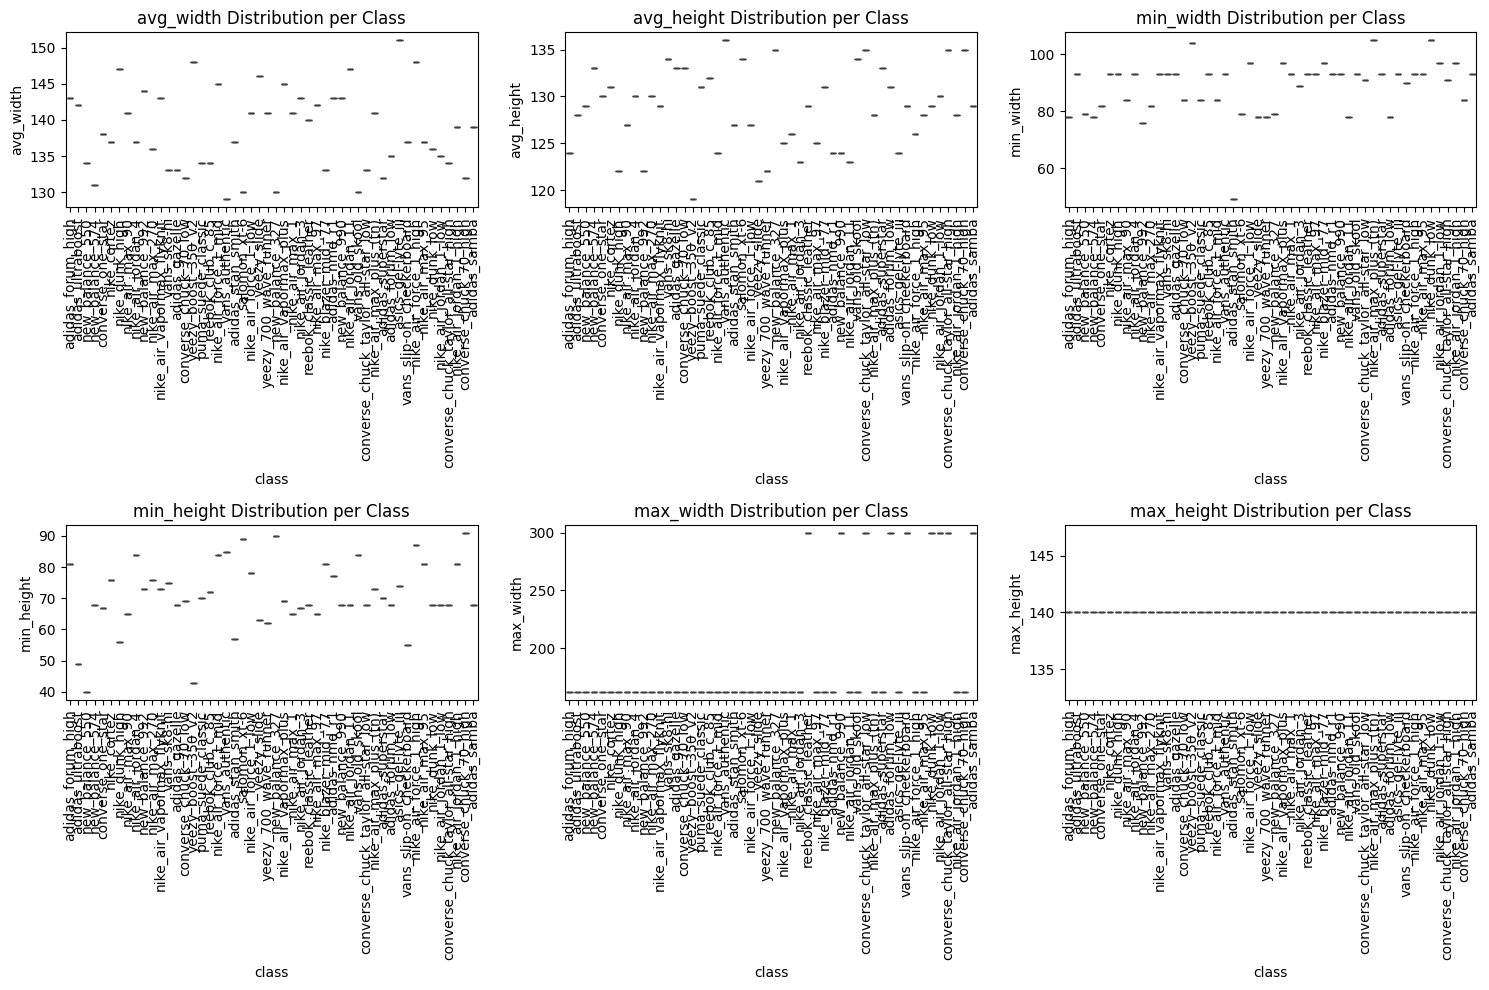

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(15, 10))
numerical_cols = ['avg_width', 'avg_height', 'min_width', 'min_height', 'max_width', 'max_height']
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    df_cleaned[col].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Image formats per class
format_counts = df_cleaned.groupby('class')['formats'].value_counts(normalize=True).unstack(fill_value=0)
plt.figure(figsize=(12, 6))
format_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Image Formats per Class')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Image Formats')
plt.tight_layout()
plt.show()

# Group-wise statistics (box plots) - final attempt to fix the warning
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='class', y=col, data=df_cleaned, showfliers=False)  # Removed palette argument
    plt.title(f'{col} Distribution per Class')
    plt.xticks(rotation=90)
    plt.ylabel(col)
plt.tight_layout()
plt.show()



---



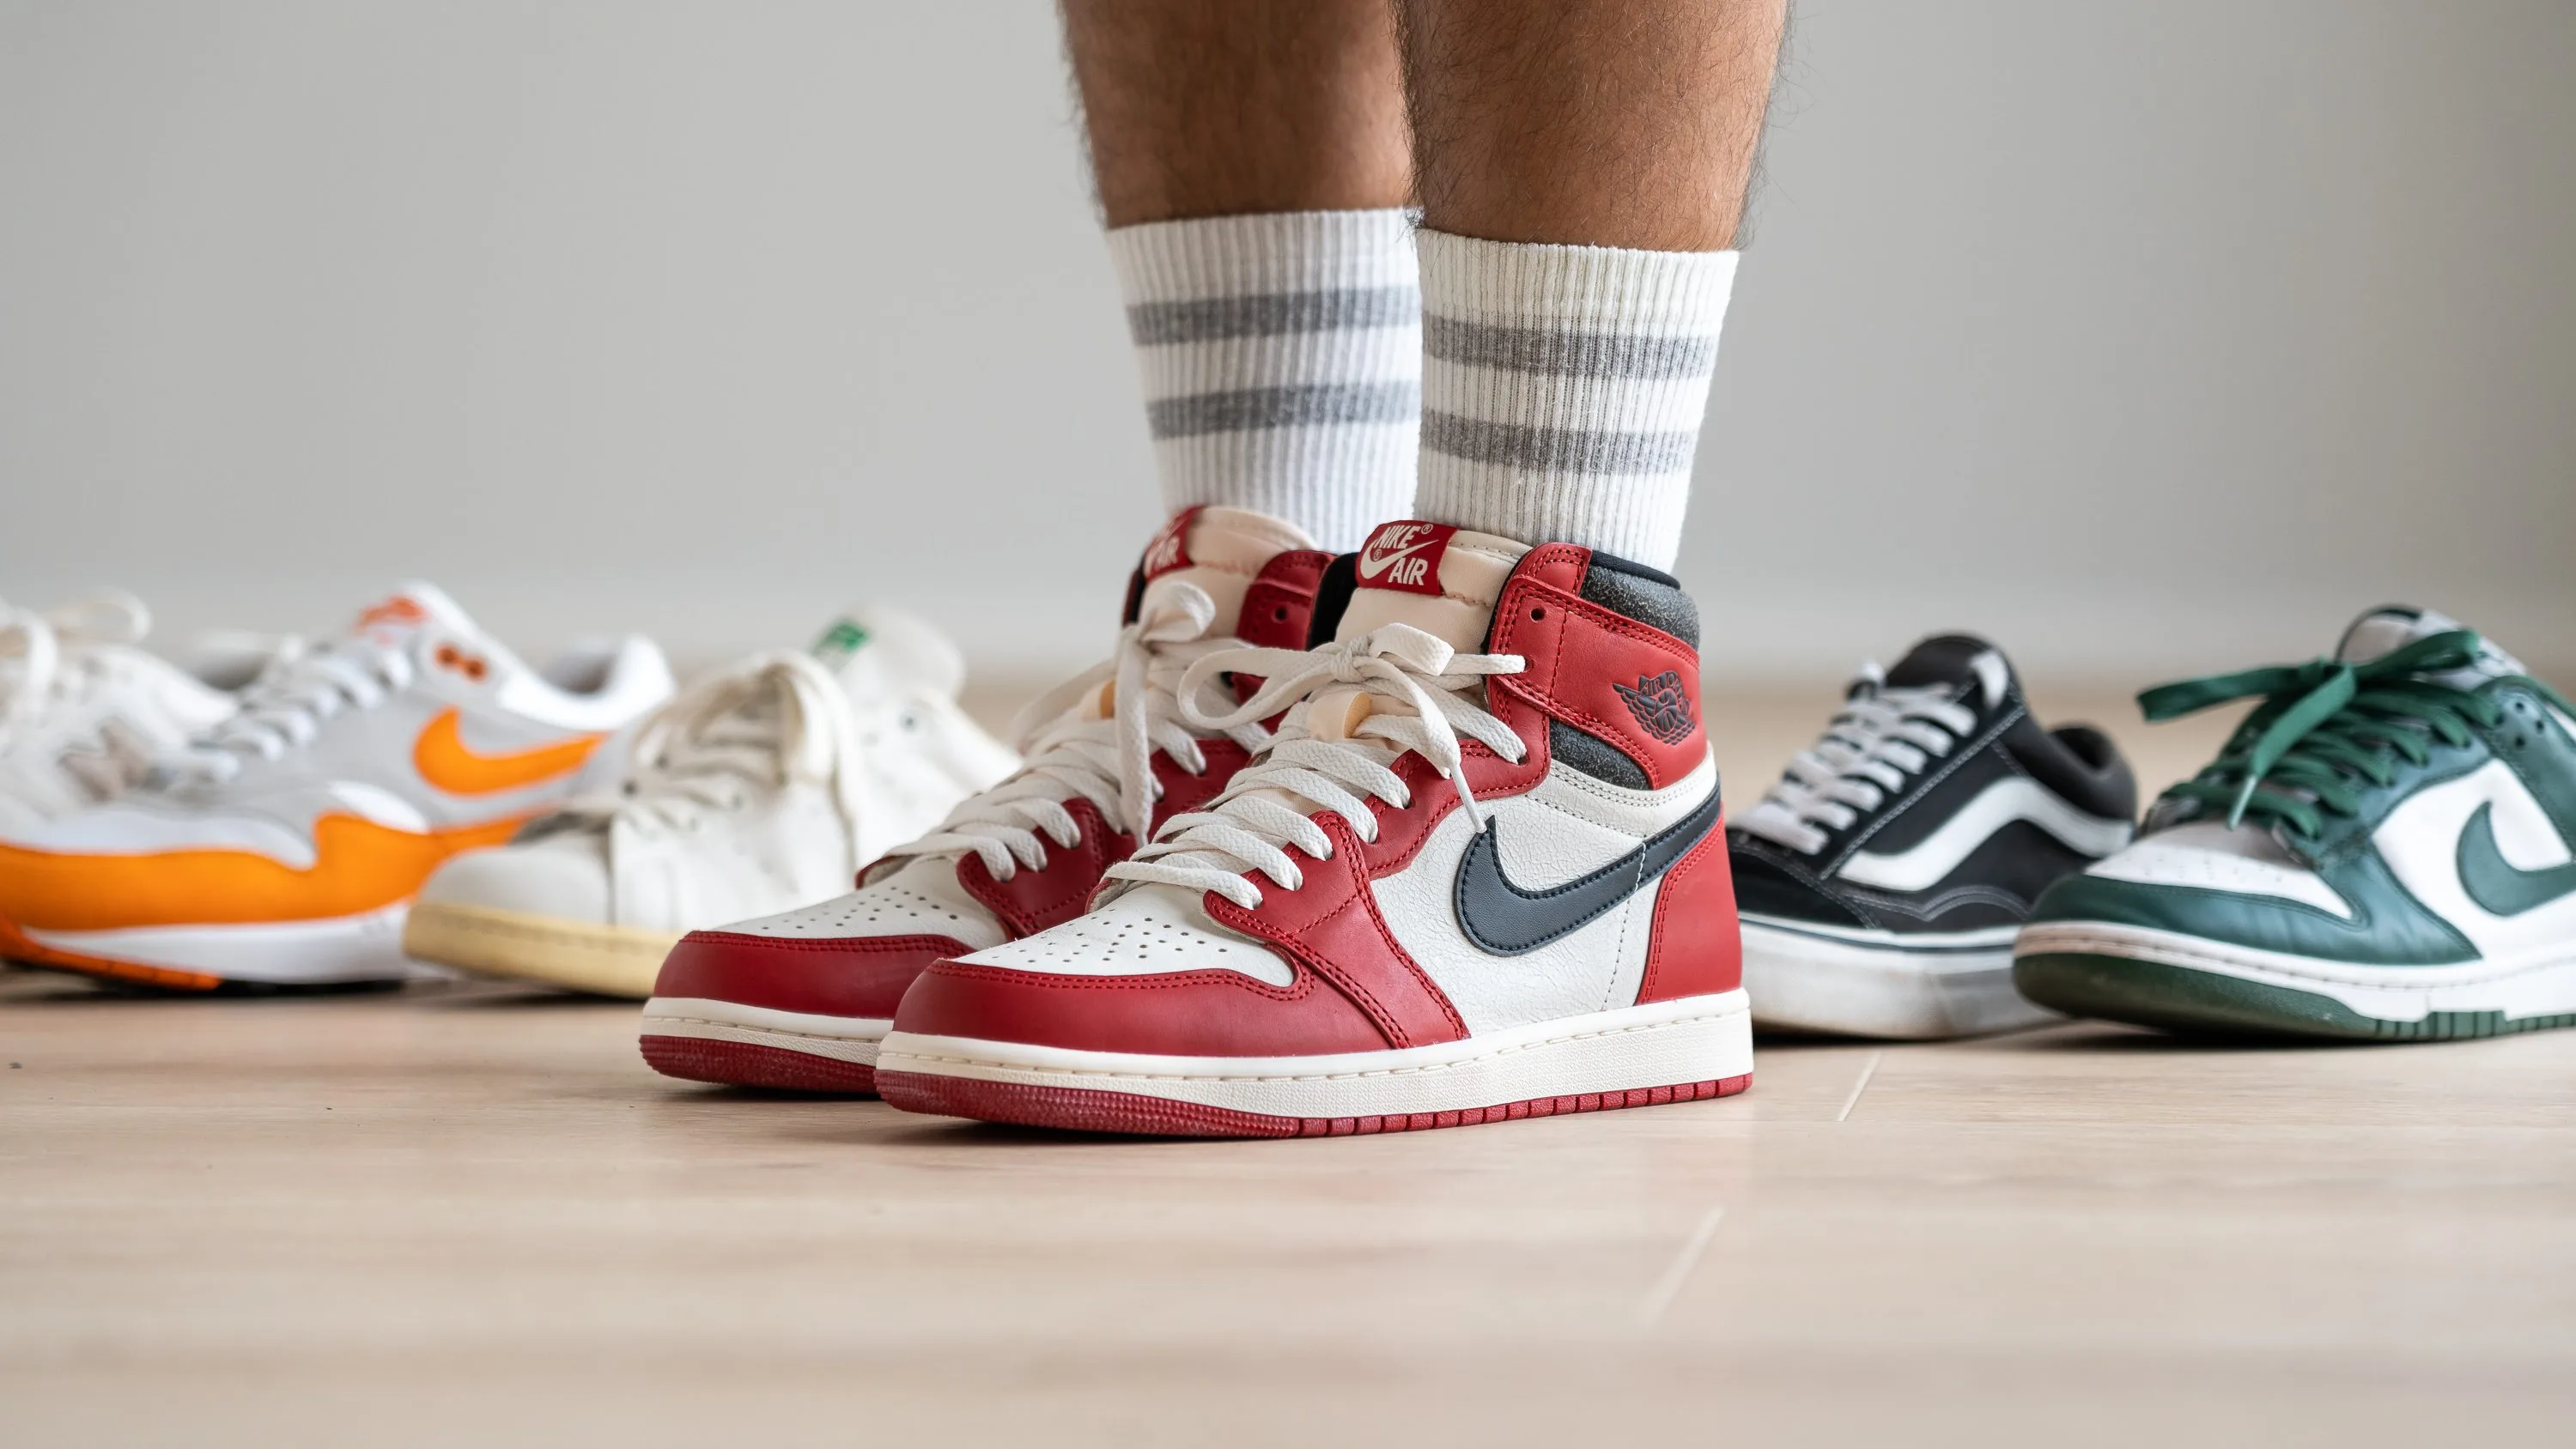